In [5]:
#imports relevant libraries for task
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts/')))

In [6]:
# diplaying maximum column size
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

# Task 1: User Overview Analysis

In [7]:
#read the cleaned telecom data
cleaned_df = pd.read_csv('../data/cleaned_Telecom_data.csv')

In [8]:
# declare functions for processing each task!
def get_top_handsets(num):
        top_handset = cleaned_df['Handset Type'].value_counts().head(num)
        return top_handset
    
def get_top_manufacturers(num):
        top_handset = cleaned_df['Handset Manufacturer'].value_counts().head(num)
        return top_handset
    
def get_handset_group():
        top_3_manufacturers = get_top_manufacturers(3)

        manufacturers = cleaned_df.groupby("Handset Manufacturer")

        for column in top_3_manufacturers.index:
            result = manufacturers.get_group(column).groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(5)
            print(f">>>> { column } <<<<")
            print(result)
            print() 

Identify the top 10 handsets used by the customers

In [9]:
top_10_handsets = get_top_handsets(10)
pd.DataFrame(top_10_handsets)

,Handset Type
Huawei B528S-23A,19754
Apple iPhone 6S (A1688),9401
Apple iPhone 6 (A1586),9004
undefined,8960
Apple iPhone 7 (A1778),6301
Apple iPhone Se (A1723),5176
Apple iPhone 8 (A1905),4985
Apple iPhone Xr (A2105),4562
Samsung Galaxy S8 (Sm-G950F),4504
Apple iPhone X (A1901),3809


In [10]:
top_10_handsets.index

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object')

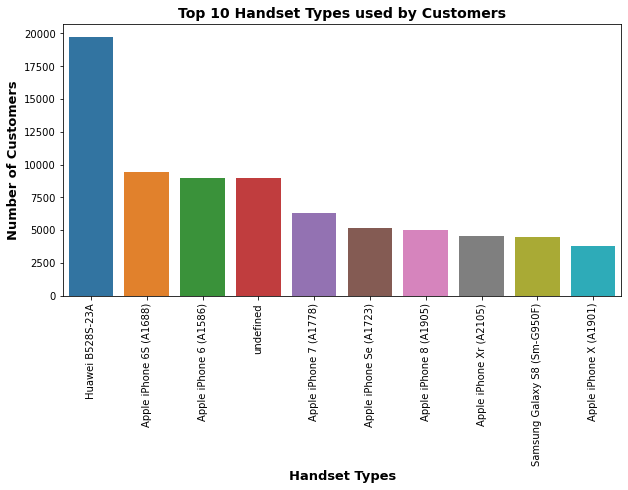

In [11]:
# Bar graph for top 10 handsets used by the customers
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handset Types used by Customers', size=14, fontweight="bold")
plt.xlabel('Handset Types', size=13, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel('Number of Customers', size=13, fontweight="bold")
plt.show()

In [13]:
# top 3 manufactures used by customers from cleaned_df

top_3_manufacturers = get_top_manufacturers(3)
pd.DataFrame(top_3_manufacturers)

,Handset Manufacturer
Apple,59442
Samsung,40689
Huawei,34353


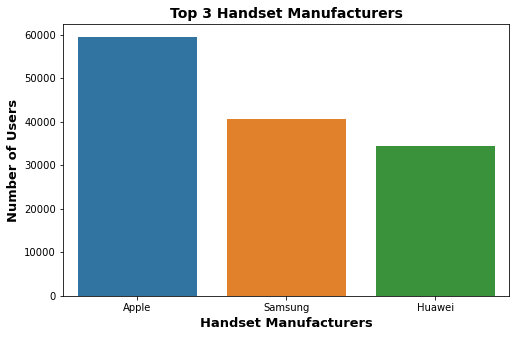

In [14]:
# Bar graph that sows the top 3 Handset Manufacturers

plt.figure(figsize=(8,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Handset Manufacturers', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [15]:
# display handset group
get_handset_group()

>>>> Apple <<<<
Handset Type
Apple iPhone 6S (A1688)    6745
Apple iPhone 6 (A1586)     6246
Apple iPhone 7 (A1778)     4676
Apple iPhone Se (A1723)    3745
Apple iPhone 8 (A1905)     3536
Name: MSISDN/Number, dtype: int64

>>>> Samsung <<<<
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3233
Samsung Galaxy J5 (Sm-J530)     2742
Samsung Galaxy A5 Sm-A520F      2702
Samsung Galaxy J3 (Sm-J330)     2583
Samsung Galaxy S7 (Sm-G930X)    2288
Name: MSISDN/Number, dtype: int64

>>>> Huawei <<<<
Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1527
Huawei E5180                       1183
Huawei P20                         1106
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64



Task 1.1: Overview of Users’ Behavior

In [16]:
# Aggregate users information based on the following columns:
cleaned_df["Social Media (Bytes)"] = cleaned_df["Social Media DL (Bytes)"] + cleaned_df['Social Media UL (Bytes)']
cleaned_df["Google (Bytes)"]       = cleaned_df["Google DL (Bytes)"] + cleaned_df["Google UL (Bytes)"]
cleaned_df['Youtube (Bytes)']      = cleaned_df["Youtube DL (Bytes)"] + cleaned_df["Youtube UL (Bytes)"]
cleaned_df['Netflix (Bytes)']      = cleaned_df["Netflix DL (Bytes)"] + cleaned_df["Netflix UL (Bytes)"]
cleaned_df["Gaming (Bytes)"]       = cleaned_df["Gaming DL (Bytes)"] + cleaned_df["Gaming UL (Bytes)"]
cleaned_df['Email (Bytes)']        = cleaned_df["Email DL (Bytes)"] + cleaned_df["Email UL (Bytes)"]
cleaned_df['Other (Bytes)']        = cleaned_df["Other DL (Bytes)"]+ cleaned_df["Other UL (Bytes)"]
cleaned_df['Total Data (Bytes)']   = cleaned_df['Total UL (Bytes)'] + cleaned_df['Total DL (Bytes)']

# Non-Graphical Univariate Analysis

"""
Aggregate users information based on the following columns:

    Number of xDR sessions
    Session duration
    the total download (DL) and upload (UL) data
    the total data volume (in Bytes) during this session for each application
"""

In [17]:
#perform aggregation based on MSISDN/Number group
aggrigation = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum', 'Total Data (Bytes)': 'sum'}
aggrigate_result = cleaned_df.groupby('MSISDN/Number').agg(aggrigation)
aggrigate_result.head()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
MSISDN/Number,,,,,
33601001722.00,1,116720.00,36053108.00,842637466.00,878690574.00
33601001754.00,1,181230.00,36104459.00,120755184.00,156859643.00
33601002511.00,1,134969.00,39306820.00,556659663.00,595966483.00
33601007832.00,1,49878.00,20327526.00,401993172.00,422320698.00
33601008617.00,2,37104.00,94280527.00,1363130417.00,1457410944.00


In [18]:
user_app_usage = cleaned_df.copy()

In [19]:
# opearion for converting bytes to megabytes
def convert_bytes_to_megabytes(column):            
        megabyte = 1*10e+5
        Total_MB = []
        for i in column.values:
            i = i / megabyte
            Total_MB.append(i)

        return Total_MB

In [20]:
# conversion to MegaBytes
user_app_usage["Social Media (MB)"] = convert_bytes_to_megabytes(user_app_usage["Social Media (Bytes)"])
user_app_usage["Google (MB)"]       = convert_bytes_to_megabytes(user_app_usage["Google (Bytes)"])
user_app_usage['Youtube (MB)']      = convert_bytes_to_megabytes(user_app_usage["Youtube (Bytes)"])
user_app_usage['Netflix (MB)']      = convert_bytes_to_megabytes(user_app_usage["Netflix (Bytes)"])
user_app_usage["Gaming (MB)"]       = convert_bytes_to_megabytes(user_app_usage["Gaming (Bytes)"])
user_app_usage['Email (MB)']        = convert_bytes_to_megabytes(user_app_usage["Email (Bytes)"])
user_app_usage['Other (MB)']        = convert_bytes_to_megabytes(user_app_usage["Other (Bytes)"])
user_app_usage['Total Data (MB)']    = convert_bytes_to_megabytes(user_app_usage["Total Data (Bytes)"]) 

In [21]:
user_app_columns = ['MSISDN/Number','Social Media (MB)','Google (MB)', 'Youtube (MB)','Netflix (MB)', \
              'Gaming (MB)', 'Email (MB)', 'Other (MB)', 'Total Data (MB)'] 

In [22]:
users_app_behavior = user_app_usage[user_app_columns].groupby('MSISDN/Number').sum().sample(10)
users_app_behavior

,Social Media (MB),Google (MB),Youtube (MB),Netflix (MB),Gaming (MB),Email (MB),Other (MB),Total Data (MB)
MSISDN/Number,,,,,,,,
33761472399.00,3.11,3.74,8.55,17.67,473.07,0.58,45.77,519.23
33663100531.00,2.10,2.77,10.75,31.63,708.13,1.38,39.90,766.84
33662378655.00,0.96,6.08,22.72,25.35,449.38,2.41,126.89,511.23
33698405347.00,2.52,5.32,29.74,31.77,114.60,0.38,590.62,198.39
33652880182.00,3.20,5.06,4.27,32.04,584.15,2.33,216.75,635.15
33670108353.00,2.81,5.44,27.38,17.93,577.89,3.85,44.97,643.85
33669228030.00,3.07,12.10,28.89,30.02,32.85,2.07,70.00,116.58
33668559544.00,1.42,5.56,21.90,30.57,834.35,2.86,249.28,901.45
33663218604.00,1.42,7.59,23.68,24.54,704.99,2.14,492.83,765.92


# Task 1.2: Exploratory Data Analysis

In [23]:
#Identifying useful insights, identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column
coloumns_for_analyze = ['Dur. (ms)', 'MSISDN/Number', 'Social Media (MB)', 'Google (MB)', 'Youtube (MB)',   
                'Netflix (MB)', 'Gaming (MB)', 'Email (MB)', 'Other (MB)', 'Total Data (MB)']

explore_feature_df = user_app_usage[coloumns_for_analyze]
explore_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149001 entries, 0 to 149000
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dur. (ms)          149001 non-null  float64
 1   MSISDN/Number      149001 non-null  float64
 2   Social Media (MB)  149001 non-null  float64
 3   Google (MB)        149001 non-null  float64
 4   Youtube (MB)       149001 non-null  float64
 5   Netflix (MB)       149001 non-null  float64
 6   Gaming (MB)        149001 non-null  float64
 7   Email (MB)         149001 non-null  float64
 8   Other (MB)         149001 non-null  float64
 9   Total Data (MB)    149001 non-null  float64
dtypes: float64(10)
memory usage: 11.4 MB


In [24]:
def convert_ms_to_sec(column):
        """
            This function takes the dataframe and the millisecond column values
            returns the second equivalence          
        """        
        
        Total_sec = []
        for i in column.values:
            i = (i / 1000) % 60
            Total_sec.append(i)

        return Total_sec

In [25]:
# Converting Dur. (ms)

explore_feature_df['Dur. (ms)'] = convert_ms_to_sec(cleaned_df['Dur. (ms)'])
explore_feature_df.rename(columns = {'Dur. (ms)':'Dur. (sec)'}, inplace=True)

In [26]:
explore_feature_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dur. (sec),149001.00,29.86,14.24,0.00,22.17,26.40,39.76,60.00
MSISDN/Number,149001.00,41879158051.11,2446901253549.37,33601001722.00,33651403844.00,33663706799.00,33683312636.00,882397108489451.00
Social Media (MB),149001.00,1.83,1.04,0.00,0.93,1.83,2.73,3.65
Google (MB),149001.00,7.81,3.52,0.04,4.94,7.81,10.68,15.53
Youtube (MB),149001.00,22.64,9.25,0.08,15.99,22.66,29.30,45.19
Netflix (MB),149001.00,22.63,9.26,0.10,15.98,22.64,29.29,45.20
Gaming (MB),149001.00,430.38,244.05,0.31,218.77,431.67,641.52,859.20
Email (MB),149001.00,2.26,1.07,0.01,1.36,2.26,3.16,4.52
Other (MB),149001.00,429.41,243.24,0.15,218.69,430.00,639.93,859.52
Total Data (MB),149001.00,495.81,244.41,28.96,284.54,496.96,706.60,955.98


In [27]:
# checking any missing values
explore_feature_df.isnull().values.any()

False

In [28]:
# Total number of missing values
explore_feature_df.isnull().sum().sum()

0

        Univariant Analysis

Analysis of a particular variable.


In [29]:
from IPython.display import Image
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go  

In [30]:
def hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

<Figure size 648x504 with 0 Axes>

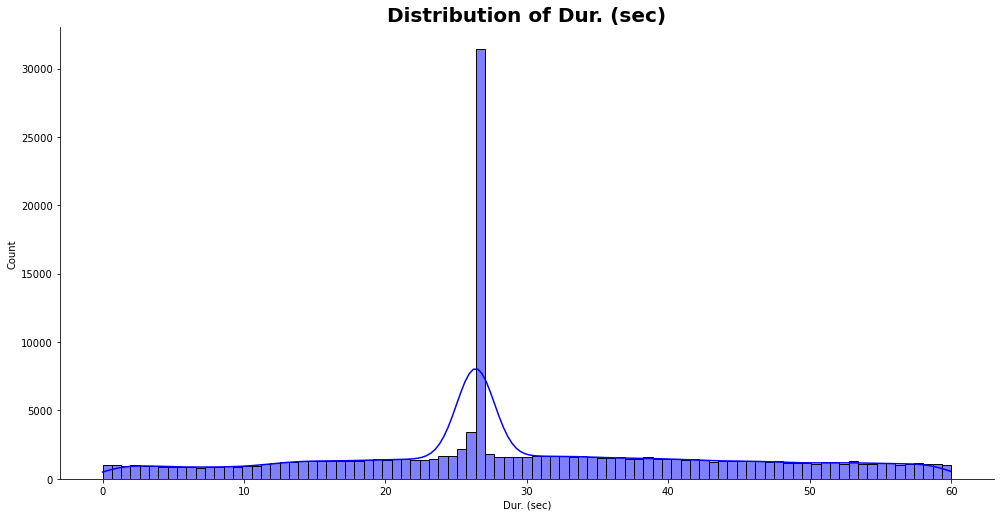

In [31]:
hist(explore_feature_df, 'Dur. (sec)', 'blue')

In [34]:
def box_plot(df: pd.DataFrame, x_col: str, title: str)->None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=90, fontsize=14)
    plt.show()

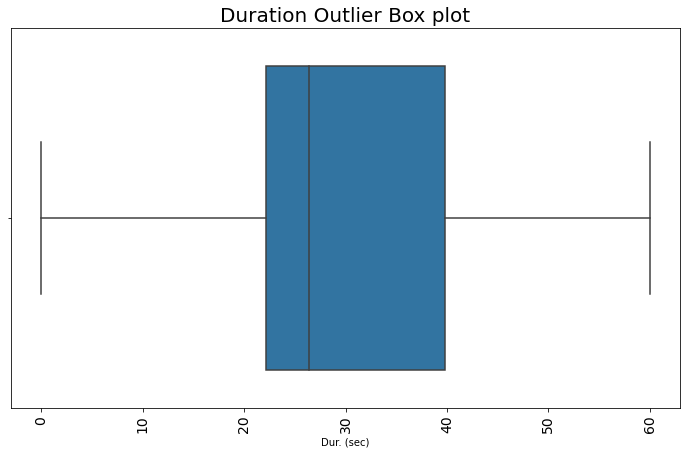

In [35]:
box_plot(explore_feature_df, 'Dur. (sec)', 'Duration Outlier Box plot')

In [36]:
def fix_outliers(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].mode(),df[column])
    
    return df[column]

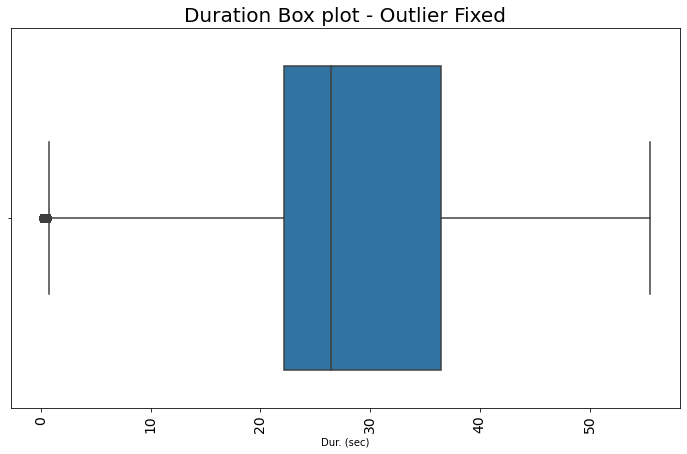

In [37]:
# fixing Duration outliers using quantile method

explore_feature_df["Dur. (sec)"] = fix_outliers(explore_feature_df, "Dur. (sec)")
box_plot(explore_feature_df, 'Dur. (sec)', 'Duration Box plot - Outlier Fixed')

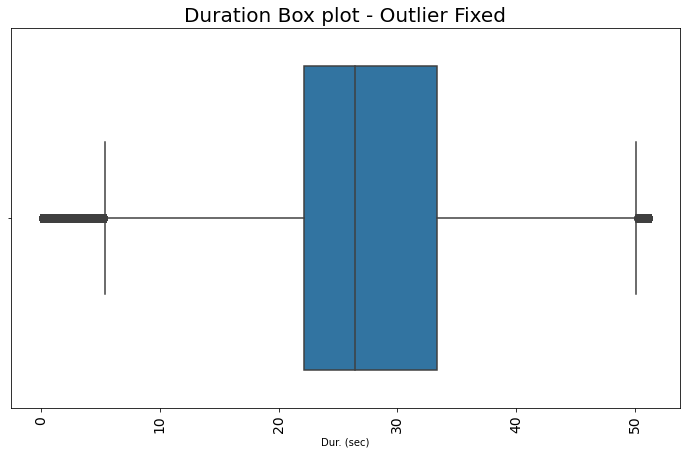

In [38]:
# fixing Duration outliers using quantile method with value 0.95

explore_feature_df["Dur. (sec)"] = fix_outliers(explore_feature_df, "Dur. (sec)")
box_plot(explore_feature_df, 'Dur. (sec)', 'Duration Box plot - Outlier Fixed')

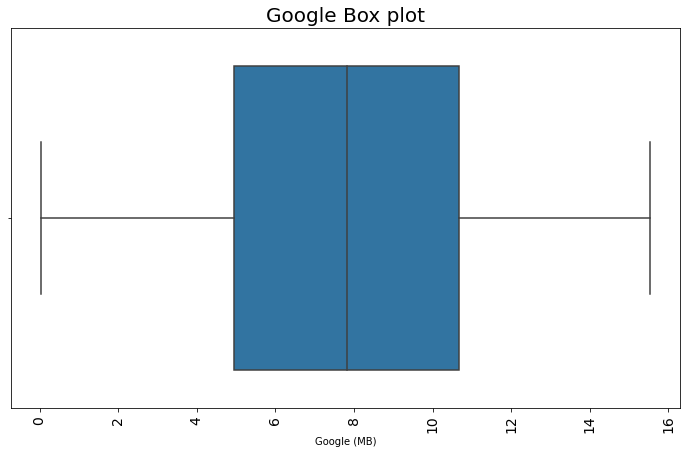

In [39]:
#Google box plotting
box_plot(explore_feature_df, 'Google (MB)', 'Google Box plot')

<Figure size 648x504 with 0 Axes>

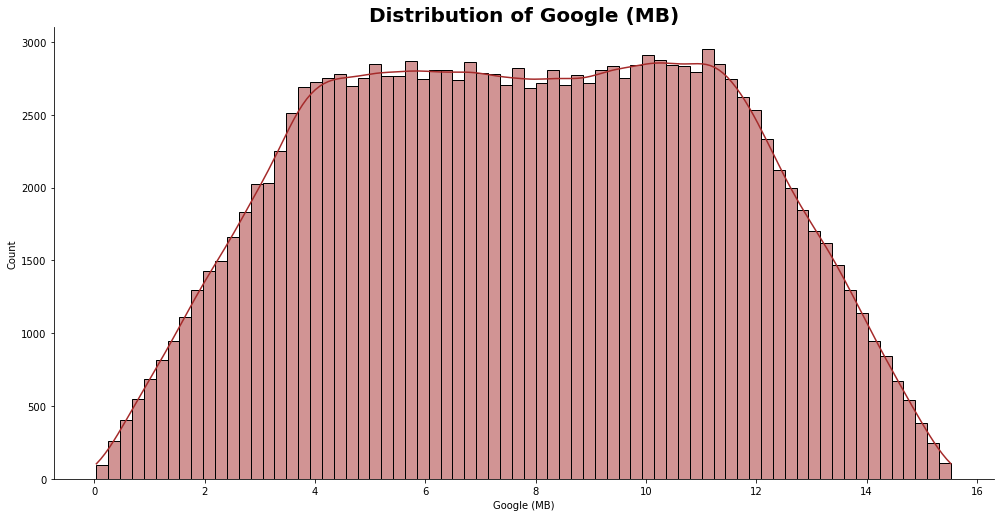

In [40]:
#google user distribution
hist(explore_feature_df, 'Google (MB)', 'brown')

<Figure size 648x504 with 0 Axes>

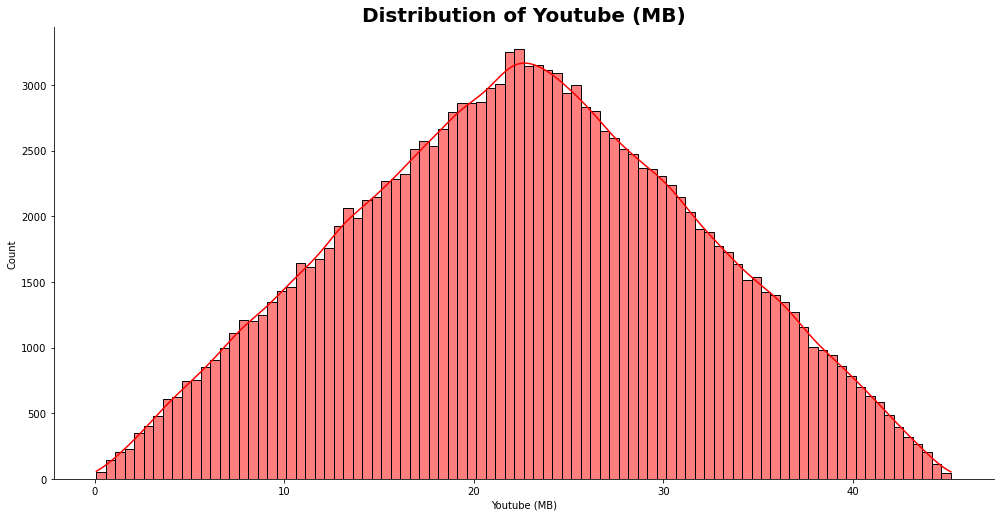

In [41]:
# Youtube user distribution
hist(explore_feature_df, 'Youtube (MB)', 'red')

<Figure size 648x504 with 0 Axes>

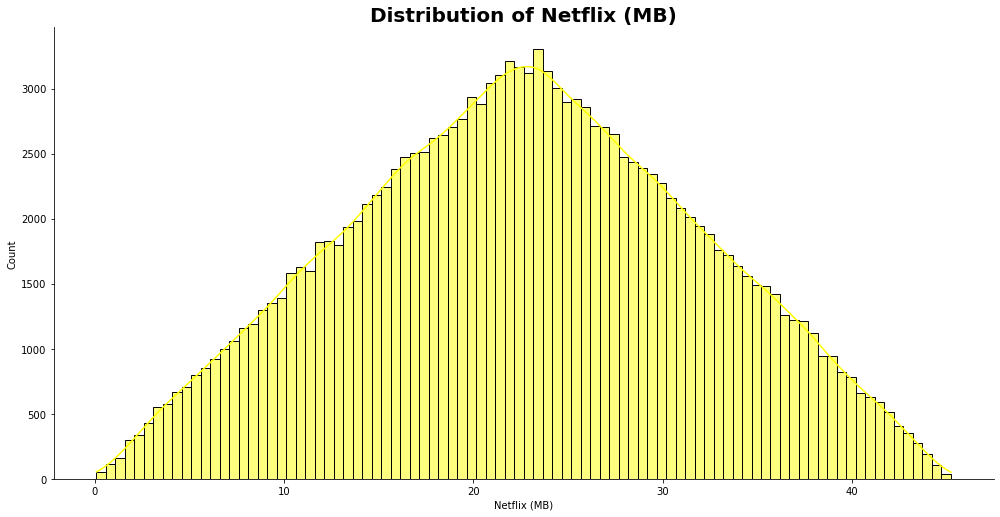

In [42]:
# Netflix user distribution
hist(explore_feature_df, 'Netflix (MB)', 'yellow')

<Figure size 648x504 with 0 Axes>

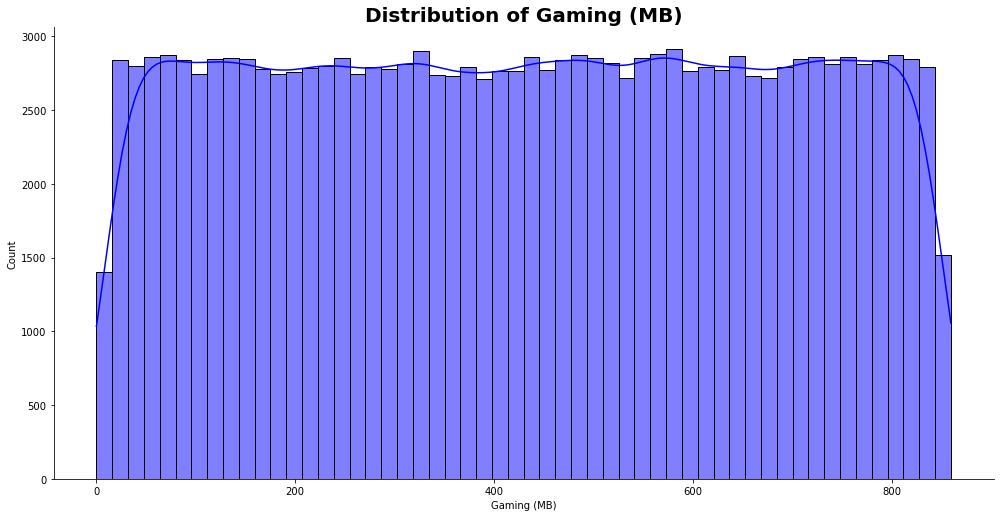

In [43]:
# gaming user distribution
hist(explore_feature_df, 'Gaming (MB)', 'blue')

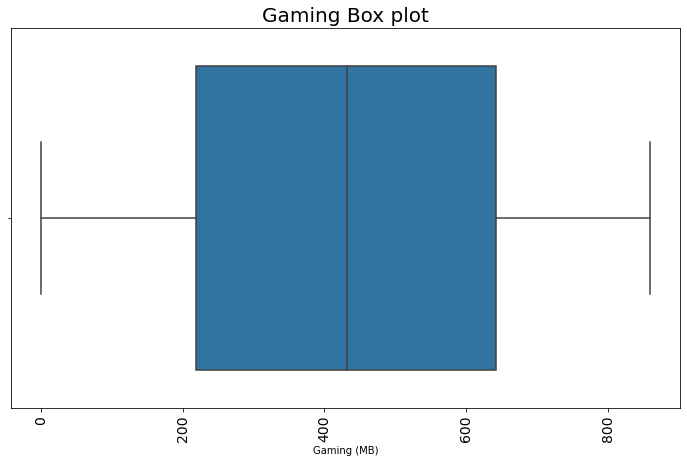

In [44]:
#box-plotting of gaming
box_plot(explore_feature_df, 'Gaming (MB)', 'Gaming Box plot')

<Figure size 648x504 with 0 Axes>

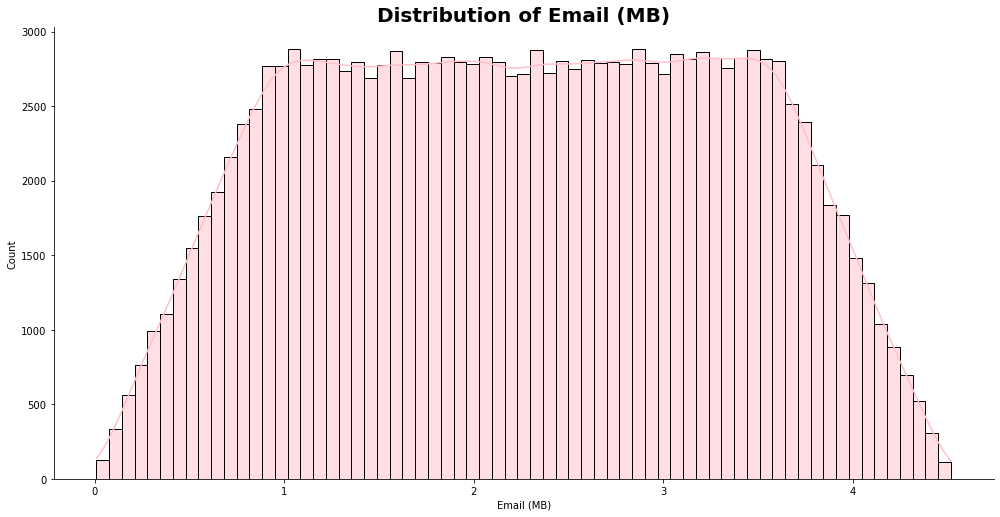

In [45]:
#user distribution of Email-app
hist(explore_feature_df, 'Email (MB)', 'pink')

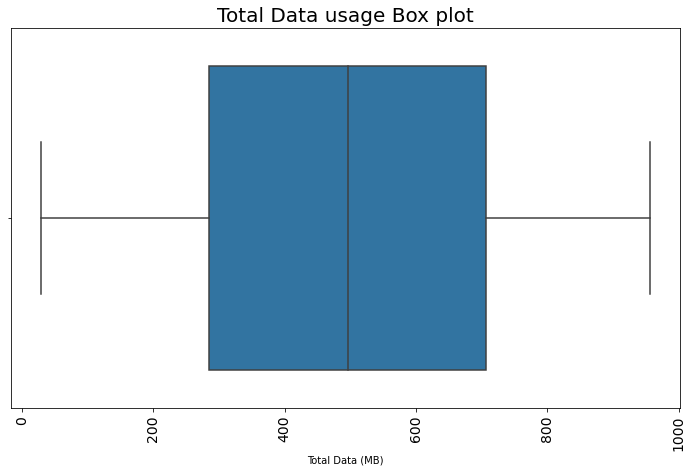

In [46]:
# Total Data Box ploting
box_plot(explore_feature_df, 'Total Data (MB)', 'Total Data usage Box plot')

<Figure size 648x504 with 0 Axes>

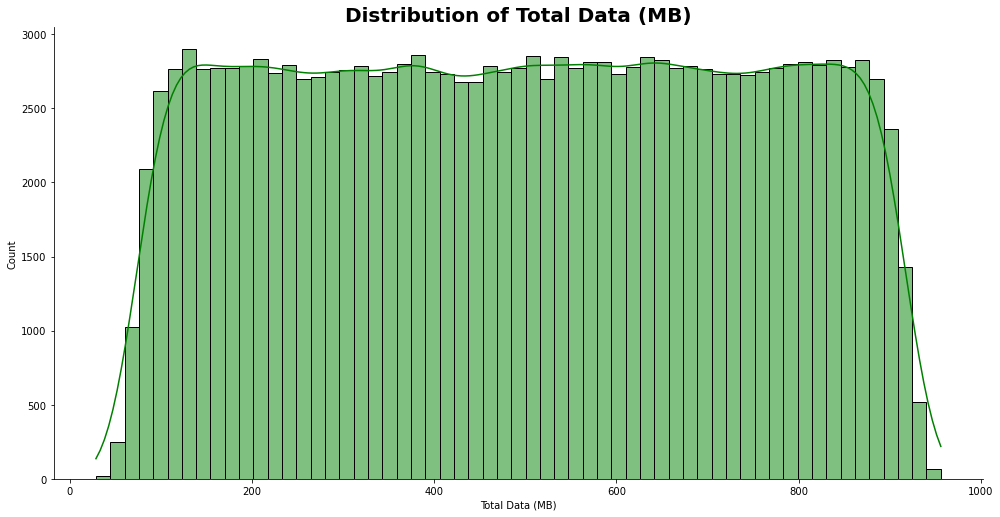

In [47]:
hist(explore_feature_df, 'Total Data (MB)', 'green')

# Bivariant Analysis

In [48]:
# looking for relationships between two columns and how our data is distributed amoung them.
user = explore_feature_df.groupby('MSISDN/Number').sum()

In [49]:
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(0, 10000)
    plt.ylim(0, 10000)
    plt.show()

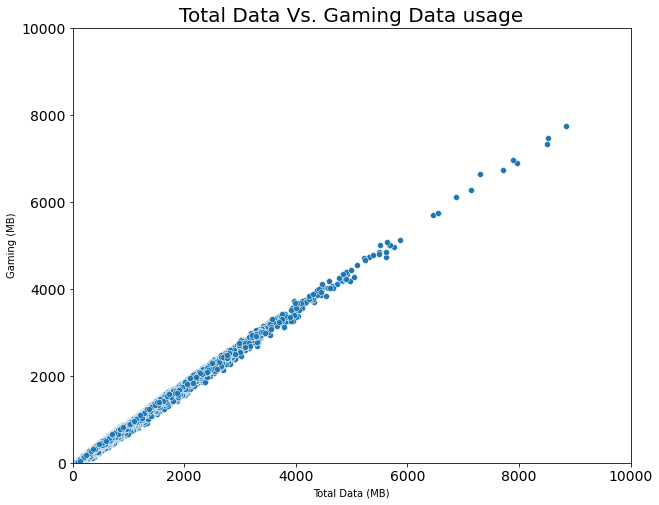

In [50]:
plot_scatter(user, 'Total Data (MB)', 'Gaming (MB)', 'Total Data Vs. Gaming Data usage', None, None)

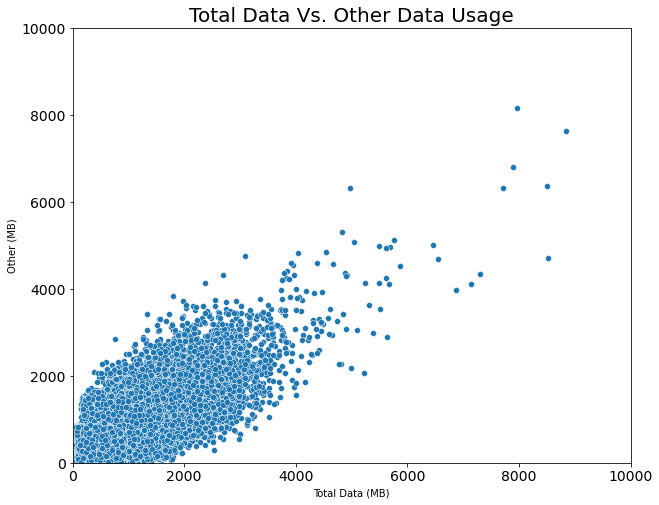

In [51]:
plot_scatter(user, 'Total Data (MB)', 'Other (MB)', 'Total Data Vs. Other Data Usage', None, None)

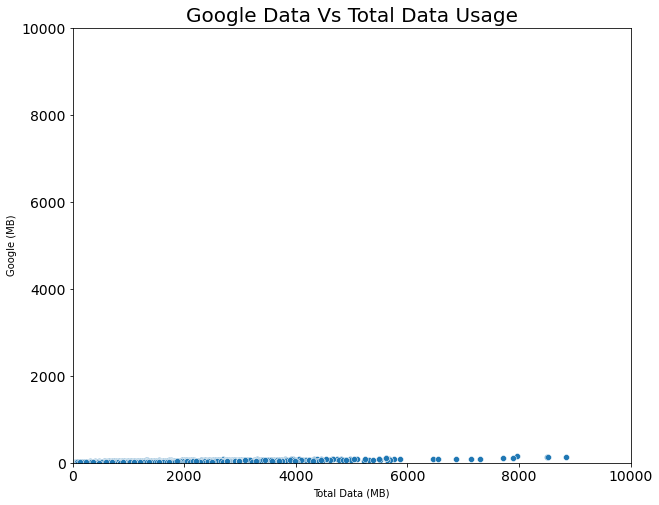

In [52]:
plot_scatter(user, 'Total Data (MB)', 'Google (MB)', 'Google Data Vs Total Data Usage', None, None)

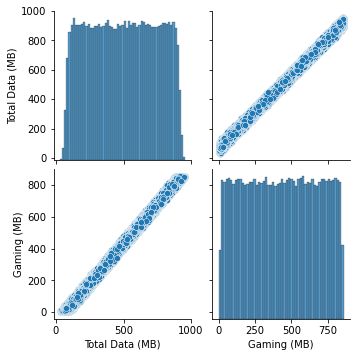

In [53]:
#to compare multiple variables at the same time
sns.pairplot(explore_feature_df, vars=['Total Data (MB)', 'Gaming (MB)'])


In [56]:
def plot_heatmap(df: pd.DataFrame, title: str, cbar=False) -> None:
    plt.figure(figsize=(15, 12))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0,
                vmax=1, fmt='.2f', linewidths=.7, cbar=cbar)
    plt.title(title, size=18, fontweight='bold')
    plt.show()

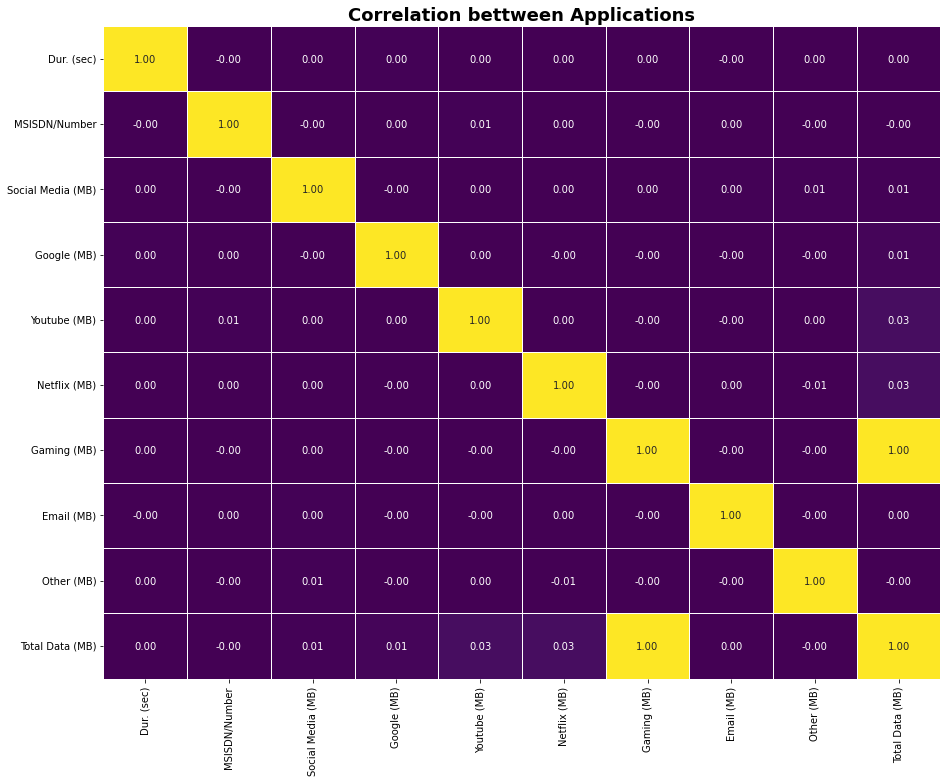

In [57]:
correlation = explore_feature_df.corr()
plot_heatmap(correlation, 'Correlation bettween Applications')

Variable transformation

In [58]:
scaled_explore_feature_df = explore_feature_df[['MSISDN/Number', 'Total Data (MB)', 'Dur. (sec)']]

scaled_explore_feature_df['Dur. (sec)'] = explore_feature_df['Dur. (sec)']/1000
scaled_explore_feature_df = scaled_explore_feature_df.rename(columns={'Dur. (sec)': 'Duration'})


In [59]:
scaled_explore_feature_df_agg = scaled_explore_feature_df.groupby('MSISDN/Number').agg({'Duration':'sum', 'Total Data (MB)': 'sum'})

In [60]:
scaled_explore_feature_df_agg 

,Duration,Total Data (MB)
MSISDN/Number,,
33601001722.00,0.03,878.69
33601001754.00,0.00,156.86
33601002511.00,0.01,595.97
33601007832.00,0.05,422.32
33601008617.00,0.04,1457.41
...,...,...
33789996170.00,0.01,714.64
33789997247.00,0.02,480.31
3197020876596.00,0.04,232.12


In [61]:
deciles = pd.qcut(scaled_explore_feature_df_agg['Duration'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile","5th_decile"], duplicates='drop')


In [62]:
explore_feature_df_with_decile = scaled_explore_feature_df_agg.copy()

explore_feature_df_with_decile['Decile'] = deciles

explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('Decile').agg({'Total Data (MB)': 'sum',
                                                                                           'Duration': 'sum'})
explore_feature_df_with_decile_agg

,Total Data (MB),Duration
Decile,,
1st_decile,11108831.08,251.13
2nd_decile,12538304.01,636.63
3rd_decile,9778069.31,541.96
4th_decile,12920116.19,925.39
5th_decile,27530442.74,1659.28


<Figure size 720x504 with 0 Axes>

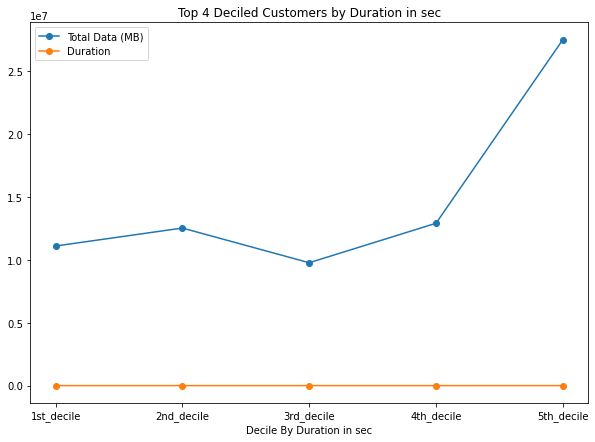

In [64]:
plt.figure(figsize=(10,7))
explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 4 Deciled Customers by Duration in sec').set_xlabel("Decile By Duration in sec")
plt.xticks(np.arange(len(explore_feature_df_with_decile_agg.index)), explore_feature_df_with_decile_agg.index)

plt.show()

In [65]:
#remove outliars
cleaned_df["Dur. (ms)"] = fix_outliers(cleaned_df, "Dur. (ms)")

In [66]:
cleaned_df.columns = cleaned_df.columns.str.replace(" ", "_") 
cleaned_df.rename(columns={'MSISDN/Number':'MSISDN_Number'}, inplace=True)

In [67]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149001 entries, 0 to 149000
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed:_0                      149001 non-null  int64  
 1   Bearer_Id                       149001 non-null  float64
 2   Start                           149001 non-null  object 
 3   Start_ms                        149001 non-null  float64
 4   End                             149001 non-null  object 
 5   End_ms                          149001 non-null  float64
 6   Dur._(ms)                       149001 non-null  float64
 7   IMSI                            149001 non-null  float64
 8   MSISDN_Number                   149001 non-null  float64
 9   IMEI                            149001 non-null  float64
 10  Last_Location_Name              149001 non-null  object 
 11  Avg_RTT_DL_(ms)                 149001 non-null  float64
 12  Avg_RTT_UL_(ms) 

In [ ]:
cleaned_df.to_csv("../data/cleaned_Telecom_data.csv")